In [176]:
library(tidyverse)
library(ggdark)
library("NatParksPalettes")
library("geomtextpath")
source("../scripts//analyze-timeseries.r")


# Time series from Well Mixed Time series

In [177]:
all.runs <- read.csv("../data/2022_07_22_parameter_sweep_stats.csv")
head(all.runs,3)

,X,N_inflow,N_reactors,ave_forward_rate,ave_outflow_rate,graph_type,mass,output_count,output_time,random_seed,...,sim_notes,sim_number,total_time,alpha,alpha.plus,alpha.minus,r2,max.AI,median.AI,weighted.mean.AI
,<int>,<int>,<int>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<dbl>,...,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,1,1,9,5e-07,1,lattice,1000,-1,1,1636141407,...,Lattice Parameter Sweep July 14 2022,10000,100,NA,NA,NA,NA,1,0.5,0.0007873810
2,2,1,9,5e-07,2,lattice,1000,-1,1,3836141407,...,Lattice Parameter Sweep July 14 2022,10001,100,NA,NA,NA,NA,1,0.5,0.0007631074
3,3,1,9,5e-07,5,lattice,1000,-1,1,1037141407,...,Lattice Parameter Sweep July 14 2022,10002,100,NA,NA,NA,NA,1,0.5,0.0006640729


In [180]:
single.reactor <- all.runs %>% filter(N_reactors == 1, 
                                      ave_forward_rate == 5e-5, 
                                      ave_outflow_rate==10)
sim_num = single.reactor$sim_number

In [181]:
ts_data <- read.csv(paste0(sim_number_to_directory(sim_num),"timeseries.csv"))

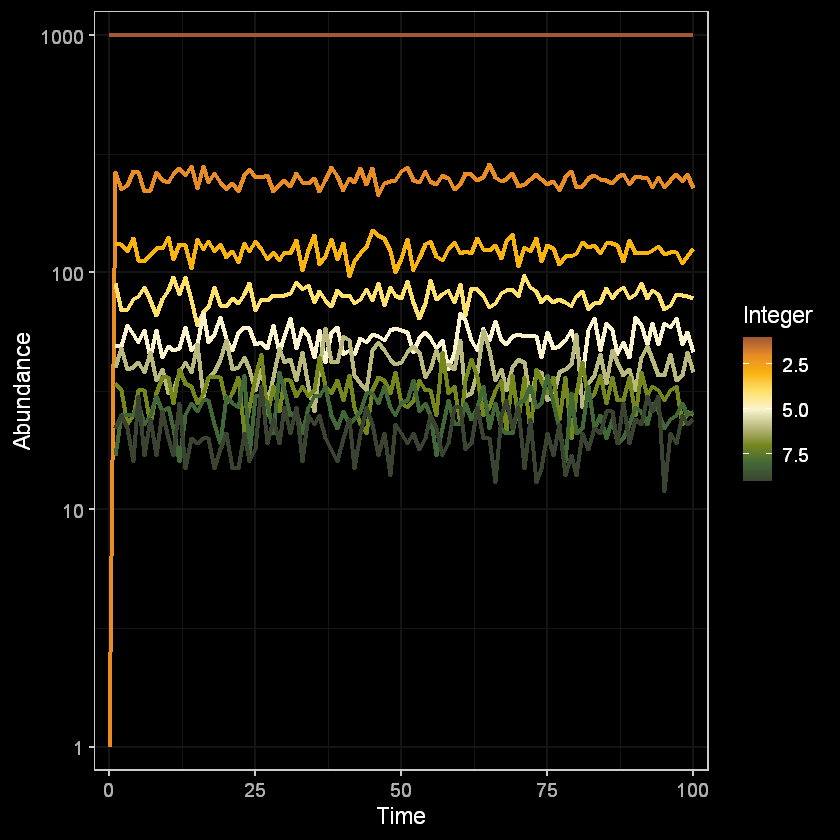

In [182]:
p <- ggplot(ts_data %>% filter(variable < 10)) + 
        geom_line(aes(x = time, 
                      y = value, 
                      group = variable, 
                      color = variable),
                  size = 1.2) +
        dark_theme_bw(base_size = 14) +
        scale_y_log10(expand = c(0,0.1)) +
        scale_x_continuous(expand =c(0.025,0.025)) +
        scale_color_gradientn(colors=natparks.pals("Olympic"), trans="reverse") +
        labs(x = "Time", y = "Abundance", color = "Integer") 
p
ggsave("../plots/220722-Well-Mixed-Timeseries.jpeg", p, height = 89, width = 89, units = "mm")
ggsave("../plots/220722-Well-Mixed-Timeseries.svg", p, height = 89, width = 89, units = "mm")

Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 192 rows containing missing values (geom_point)."
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 192 rows containing missing values (geom_point)."
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 192 rows containing missing values (geom_point)."


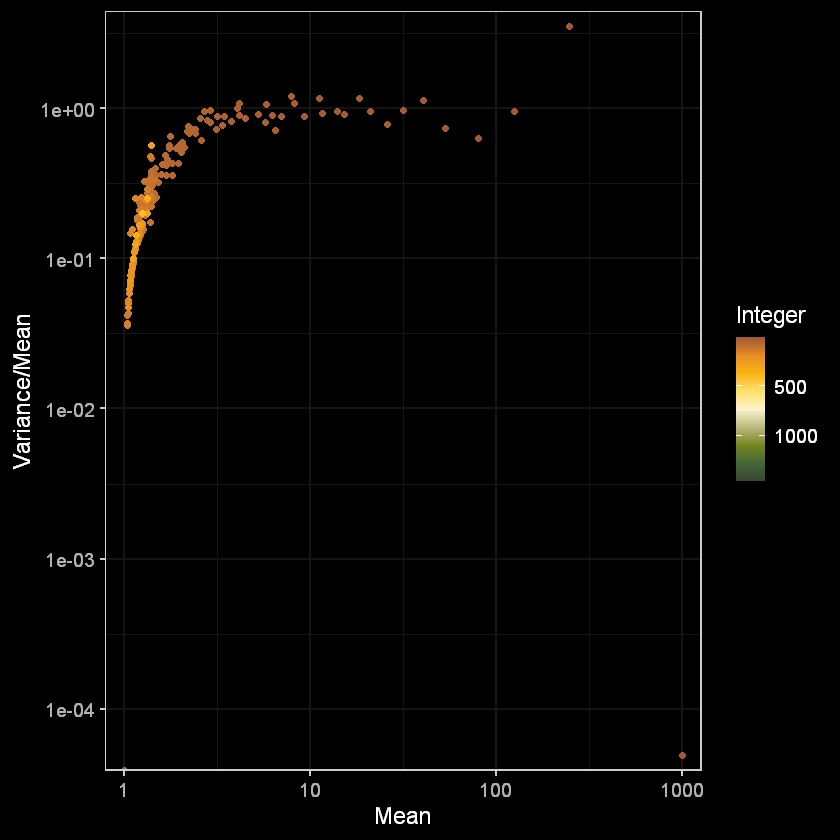

In [115]:
ts_averages <- ts_data %>% 
                group_by(variable) %>% 
                summarise(mean = mean(value), 
                          std = var(value)/mean(value))
p <- ggplot(ts_averages) + 
        geom_point(aes(x = mean,
                       y = std, 
                       color = variable)) +
        dark_theme_bw(base_size = 14) +
        scale_y_log10(expand = c(0,0.1)) +
        scale_x_log10(expand =c(0.025,0.025)) +
        scale_color_gradientn(colors=natparks.pals("Olympic"), trans="reverse") +
        labs(x = "Mean", y = "Variance/Mean", color = "Integer") 
p
ggsave("../plots/220722-Well-Mixed-VarMean.jpeg", p, height = 89, width = 89, units = "mm")
ggsave("../plots/220722-Well-Mixed-VarMean.svg", p, height = 89, width = 89, units = "mm")

In [183]:
ts_data <- ts_data %>% filter(value > 1)
ts_data$AI <- assembly_index(ts_data$variable)

In [184]:
coarse_grainned_ts <- ts_data %>% group_by(AI, time) %>% summarise(total = sum(value))

`summarise()` has grouped output by 'AI'. You can override using the `.groups` argument.


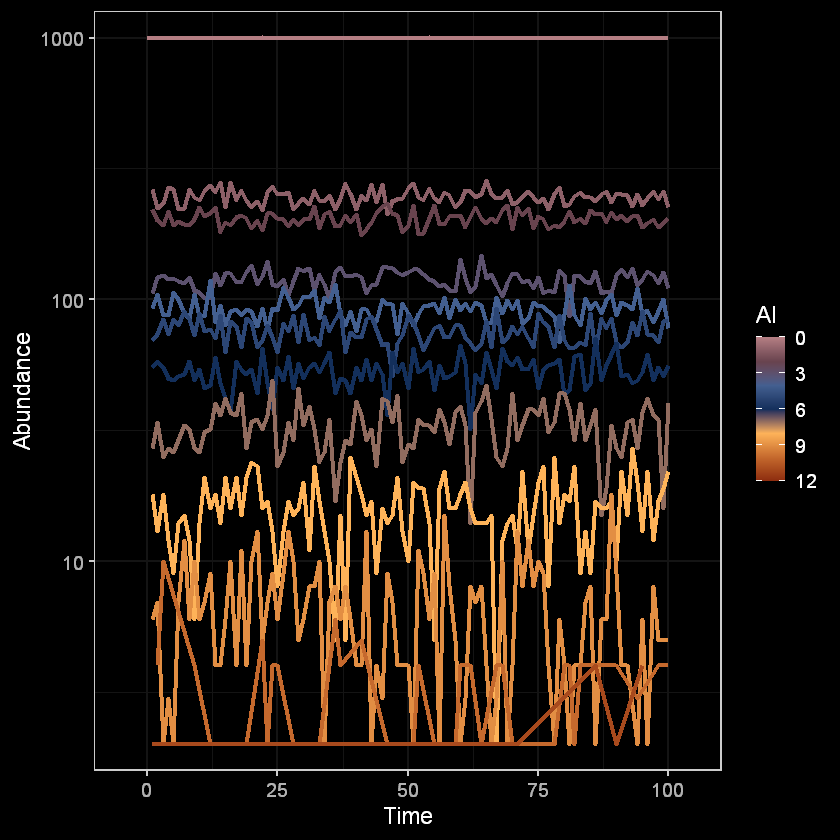

In [185]:
p <- ggplot(coarse_grainned_ts) + 
        geom_line(aes(x = time,
                      y = total,
                      group = AI, 
                      color = AI),
                  size = 1.2) +
        dark_theme_bw(base_size = 14) +
        scale_y_log10(expand = c(0, 0.1)) + 
        scale_x_continuous(expand = c(0.1,0.1)) +
        scale_color_gradientn(colors=natparks.pals("DeathValley"), trans="reverse") +
        labs(x = "Time", y = "Abundance", color = "AI") 
p
ggsave("../plots/220722-Well-Mixed-AI-Timeseries.jpeg", p, height = 89, width = 89, units = "mm")
ggsave("../plots/220722-Well-Mixed-AI-Timeseries.svg", p, height = 89, width = 89, units = "mm")

In [144]:
coarse_grainned_ave <- coarse_grainned_ts %>% 
                        group_by(AI) %>% 
                        summarise(mean = mean(total), 
                                  std = var(total)/mean(total))

Warning message:
"Removed 1 rows containing missing values (geom_point)."
Warning message:
"Removed 1 rows containing missing values (geom_point)."
Warning message:
"Removed 1 rows containing missing values (geom_point)."


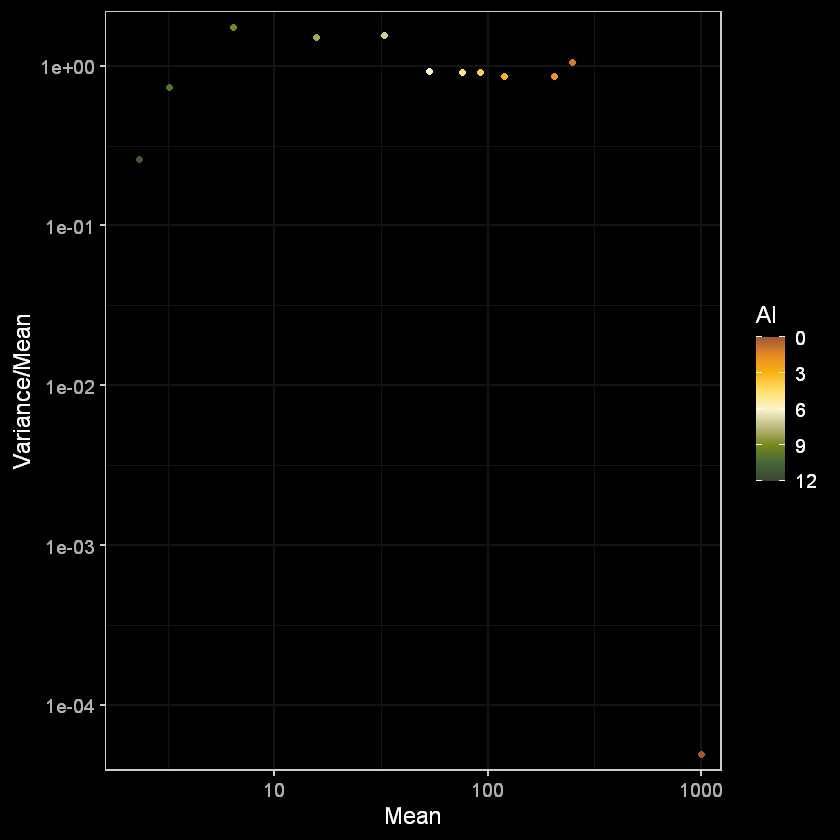

In [146]:
p <- ggplot(coarse_grainned_ave) + 
        geom_point(aes(x = mean,
                       y = std, 
                       color = AI)) +
        dark_theme_bw(base_size = 14) +
        scale_y_log10(expand = c(0,0.1)) +
        scale_x_log10(expand =c(0.025,0.025)) +
        scale_color_gradientn(colors=natparks.pals("Olympic"), trans="reverse") +
        labs(x = "Mean", y = "Variance/Mean", color = "AI") 
p
ggsave("../plots/220722-Well-Mixed-AI-VarMean.jpeg", p, height = 89, width = 89, units = "mm")
ggsave("../plots/220722-Well-Mixed-AI-VarMean.svg", p, height = 89, width = 89, units = "mm")

In [56]:
# ave_coarse_grainned <- coarse_grainned_ts %>% group_by(AI) %>% summarise(ave_total = mean(total))

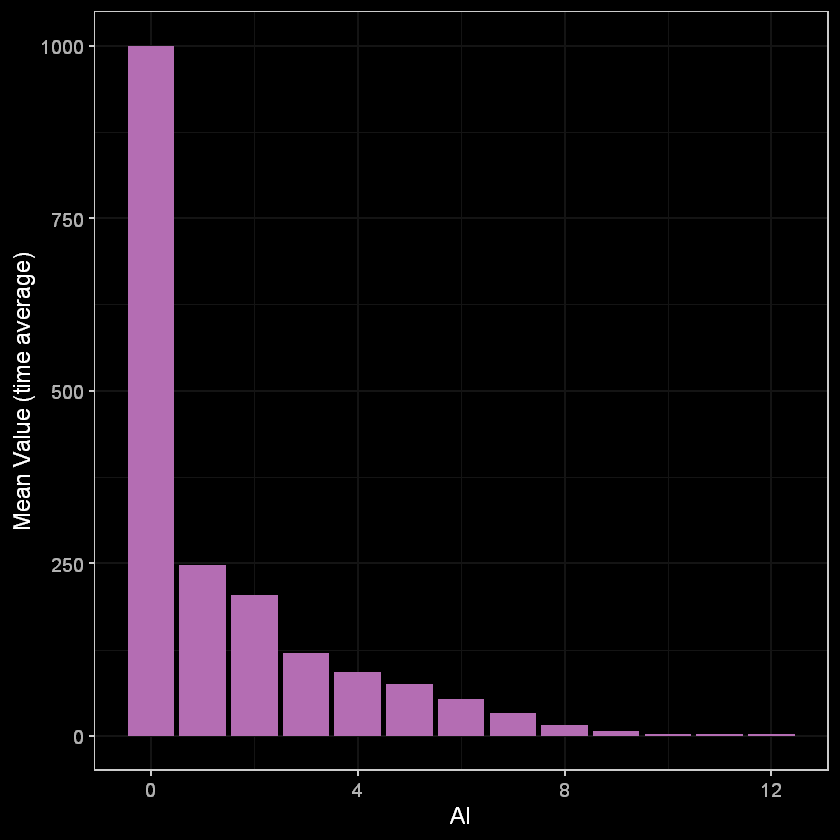

In [151]:
p <- ggplot(coarse_grainned_ave) +
        geom_col(aes(x = AI,
                     y = mean), 
                 fill = natparks.pals("Arches2")[3]) +
        dark_theme_bw(base_size = 14) + 
        labs(x = "AI", y = "Mean Value (time average)", color = "AI") 
p

ggsave("../plots/220722-Well-Mixed-AI-Dist.jpeg", p, height = 89, width = 89, units = "mm")
ggsave("../plots/220722-Well-Mixed-AI-Dist.svg", p, height = 89, width = 89, units = "mm")

# Time series Linear Chain Flow

In [152]:
linear.reactor <- all.runs %>% filter(N_reactors == 4,
                                      graph_type == "line",
                                      ave_forward_rate == 5e-5, 
                                      ave_outflow_rate==10)
sim_num = linear.reactor$sim_number
sim_num

[1] 4119

In [153]:
ts_data <- read.csv(paste0(sim_number_to_directory(sim_num),"timeseries.csv"))

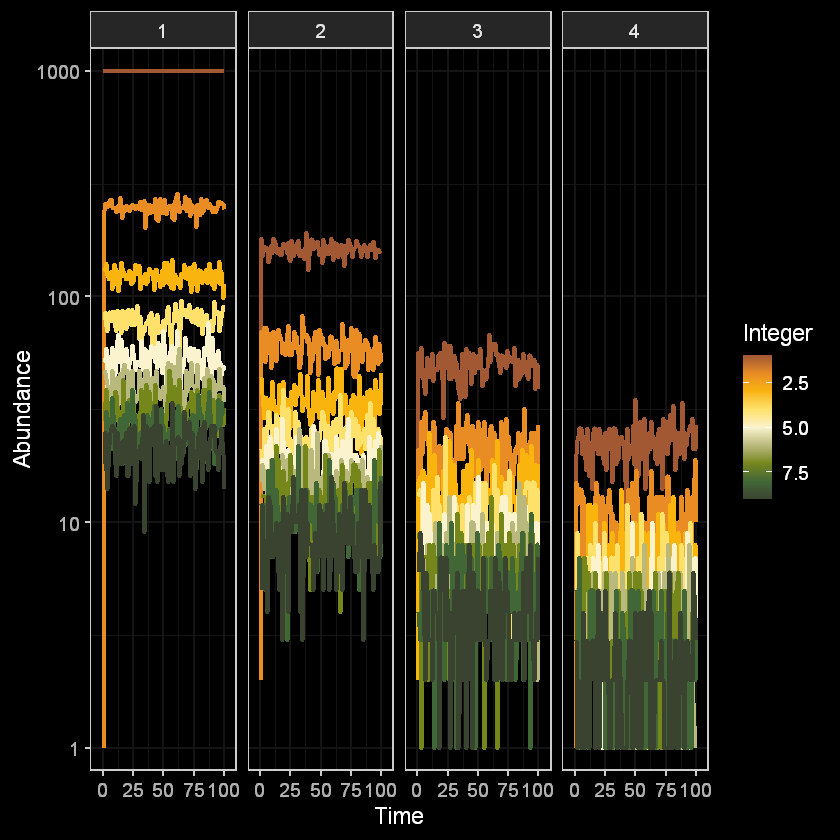

In [157]:
p <- ggplot(ts_data %>% filter(variable < 10)) + 
        geom_line(aes(x = time, 
                      y = value, 
                      group = variable, 
                      color = variable,),
                  size = 1.2) +
        dark_theme_bw(base_size = 14) +
        scale_y_log10(expand = c(0,0.1)) +
        scale_x_continuous(expand =c(0.1,0.1)) +
        scale_color_gradientn(colors=natparks.pals("Olympic"), trans="reverse") + 
        facet_wrap(~reactor, nrow = 1) + 
        labs(x = "Time", y = "Abundance", color = "Integer") 
p
ggsave("../plots/220722-Line-Timeseries.jpeg", p, height = 89, width = 183, units = "mm")
ggsave("../plots/220722-Line-Timeseries.svg", p, height = 89, width = 183, units = "mm")

In [158]:
ts_data <- ts_data %>% filter(value > 2)
ts_data$AI <- assembly_index(ts_data$variable)

In [159]:
coarse_grainned <- ts_data %>% group_by(AI, time, reactor) %>% summarise(total = sum(value))

`summarise()` has grouped output by 'AI', 'time'. You can override using the `.groups` argument.


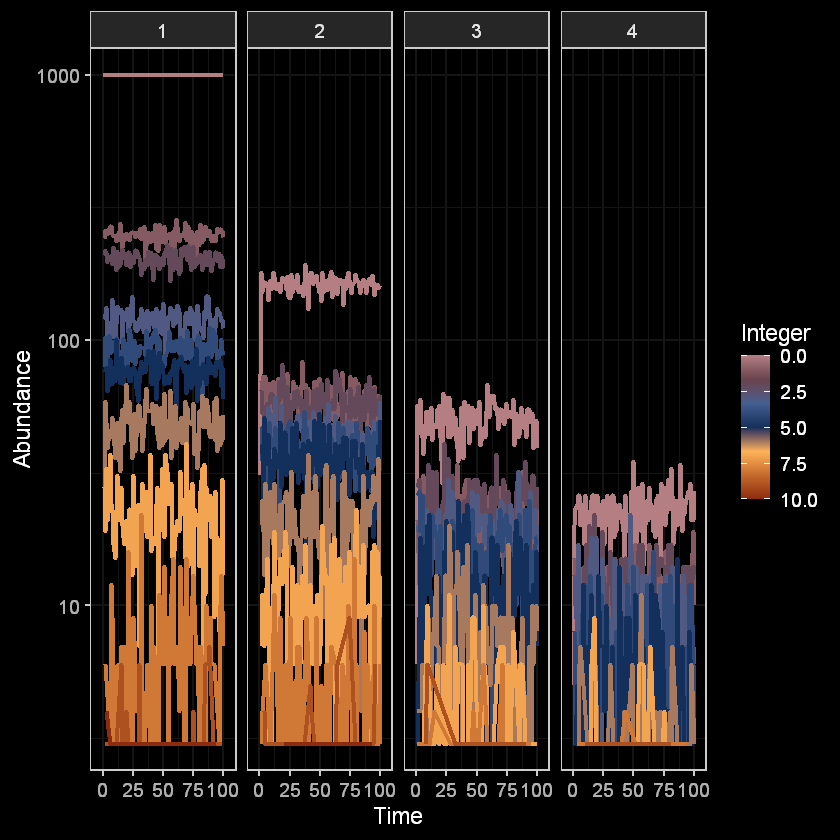

In [161]:
p <- ggplot(coarse_grainned) + 
        geom_line(aes(x = time,
                      y = total,
                      group = AI, 
                      color = AI),
                  size = 1.2) +
        dark_theme_bw(base_size = 14) + 
        scale_y_log10(expand = c(0, 0.1)) + 
        scale_x_continuous(expand = c(0.1,0.1)) +
        scale_color_gradientn(colors=natparks.pals("DeathValley"), trans="reverse") + 
        facet_wrap(~reactor, nrow = 1) + 
        labs(x = "Time", y = "Abundance", color = "Integer") 
p
ggsave("../plots/220722-Line-AI-Timeseries.jpeg", p, height = 89, width = 183, units = "mm")
ggsave("../plots/220722-Line-AI-Timeseries.svg", p, height = 89, width = 183, units = "mm")

In [162]:
ave_coarse_grainned <- coarse_grainned %>% group_by(AI, reactor) %>% summarise(ave_total = mean(total))

`summarise()` has grouped output by 'AI'. You can override using the `.groups` argument.


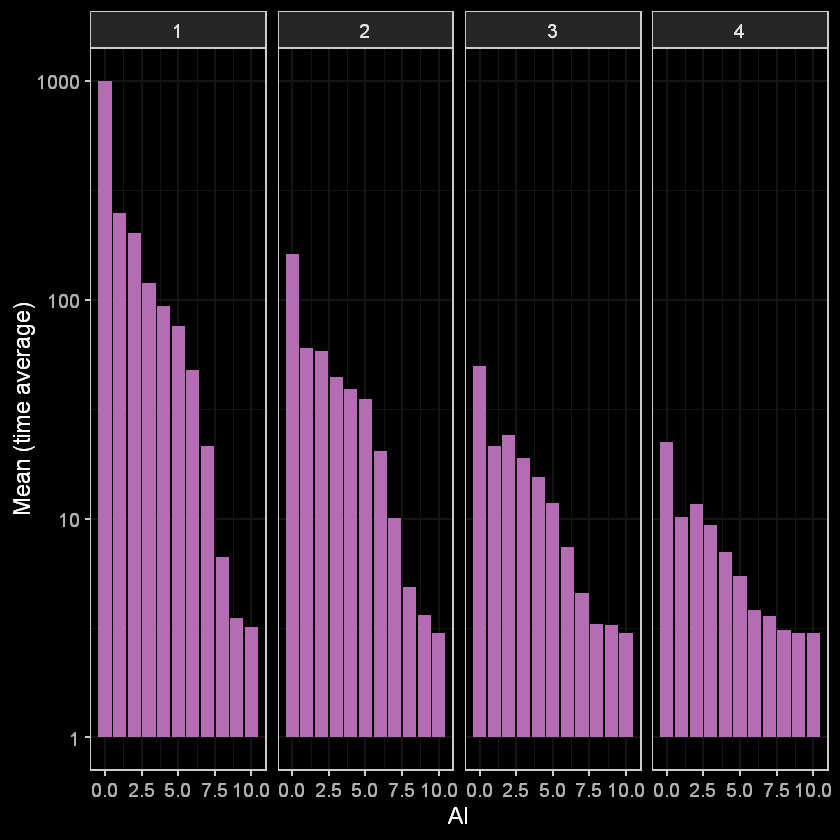

In [164]:
p <- ggplot(ave_coarse_grainned) +
        geom_col(aes(x = AI,
                     y = ave_total), 
                 fill = natparks.pals("Arches2")[3]) +
        dark_theme_bw(base_size = 14) + 
        scale_y_log10() + 
        facet_wrap(~reactor, nrow = 1) + 
        labs(x = "AI", y = "Mean (time average)") 
p
ggsave("../plots/220722-Line-AI-Dist.jpeg", p, height = 89, width = 183, units = "mm")
ggsave("../plots/220722-Line-AI-Dist.svg", p, height = 89, width = 183, units = "mm")

# Time Series for Lattice 

In [165]:
linear.reactor <- all.runs %>% filter(N_reactors == 4,
                                      graph_type == "lattice",
                                      ave_forward_rate == 5e-5, 
                                      ave_outflow_rate==10)
sim_num = linear.reactor$sim_number
sim_num

[1] 5019

In [166]:
ts_data <- read.csv(paste0(sim_number_to_directory(sim_num),"timeseries.csv"))

Warning message:
"Ignoring unknown aesthetics: label"


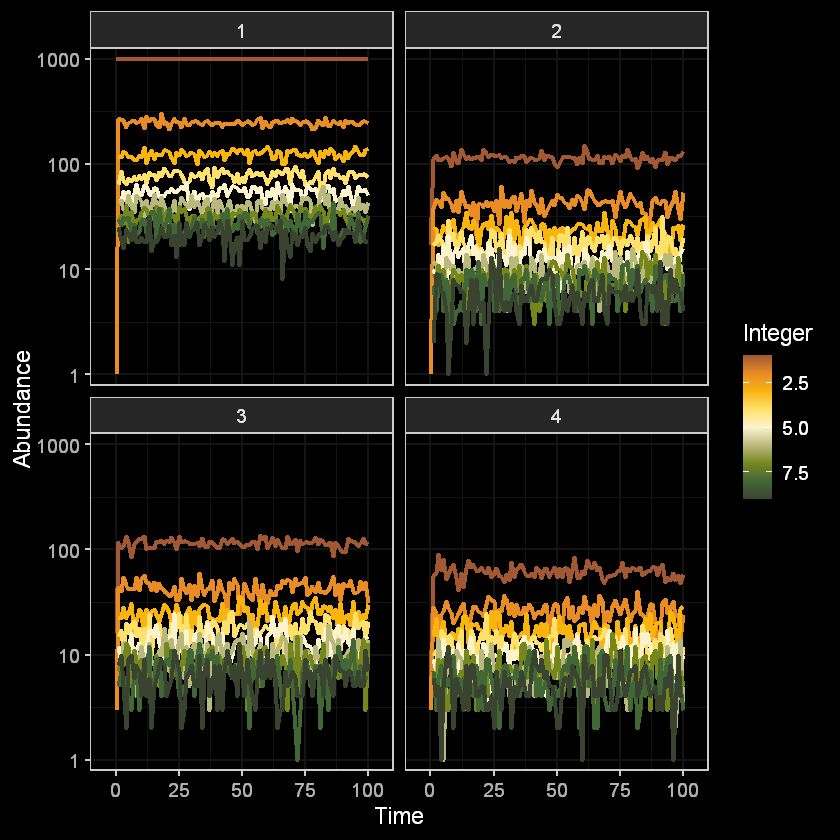

In [169]:
p <- ggplot(ts_data %>% filter(variable < 10)) + 
        geom_line(aes(x = time, 
                      y = value, 
                      group = variable, 
                      color = variable,
                      label = variable),
                  size = 1.2) +
        dark_theme_bw(base_size = 14) +
        scale_y_log10(expand = c(0,0.1)) +
        scale_x_continuous(expand =c(0.1,0.1)) +
        scale_color_gradientn(colors=natparks.pals("Olympic"), trans="reverse") + 
        facet_wrap(~reactor, nrow = 2) + 
        labs(x = "Time", y = "Abundance", color = "Integer") 
p
ggsave("../plots/220722-Lattice-Timeseries.jpeg", p, height = 1.33*89, width = 0.66*183, units = "mm")
ggsave("../plots/220722-Lattice-Timeseries.svg", p, height = 1.33*89, width = 0.66*183, units = "mm")

In [170]:
ts_data <- ts_data %>% filter(value > 2)
ts_data$AI <- assembly_index(ts_data$variable)

In [171]:
coarse_grainned <- ts_data %>% group_by(AI, time, reactor) %>% summarise(total = sum(value))

`summarise()` has grouped output by 'AI', 'time'. You can override using the `.groups` argument.


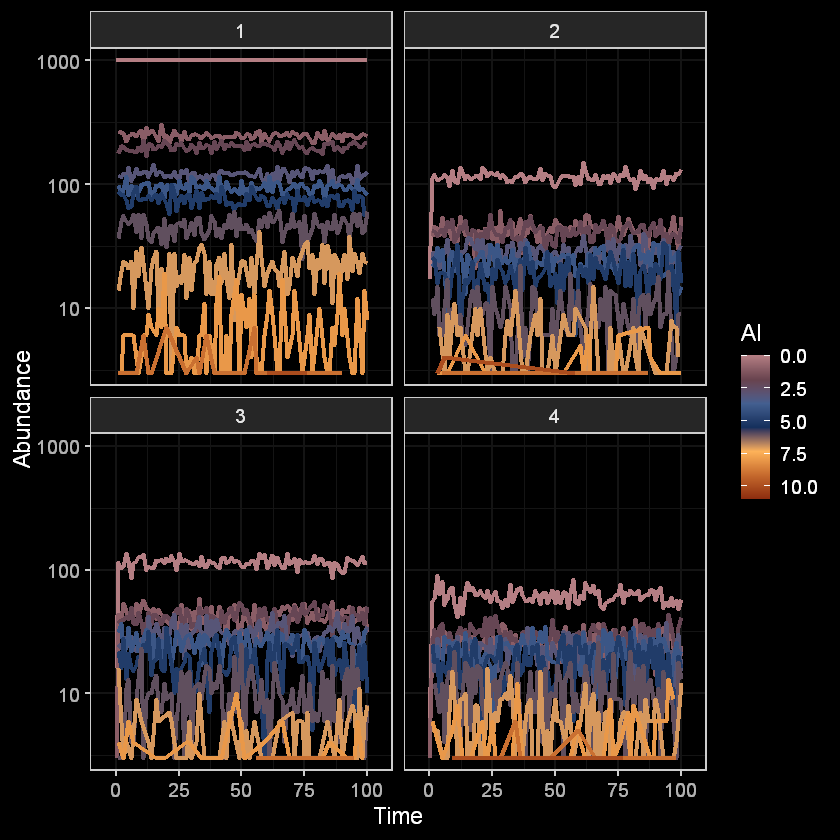

In [173]:
p <- ggplot(coarse_grainned) + 
        geom_line(aes(x = time,
                      y = total,
                      group = AI, 
                      color = AI),
                  size = 1.2) +
        dark_theme_bw(base_size = 14) + 
        scale_y_log10(expand = c(0, 0.1)) + 
        scale_x_continuous(expand = c(0.1,0.1)) +
        scale_color_gradientn(colors=natparks.pals("DeathValley"), trans="reverse") + 
        facet_wrap(~reactor, nrow = 2) + 
        labs(x = "Time", y = "Abundance", color = "AI") 
p
ggsave("../plots/220722-Lattice-AI-Timeseries.jpeg", p, height = 1.33*89, width = 0.66*183, units = "mm")
ggsave("../plots/220722-Lattice-AI-Timeseries.svg", p, height = 1.33*89, width = 0.66*183, units = "mm")

In [174]:
ave_coarse_grainned <- coarse_grainned %>% group_by(AI, reactor) %>% summarise(ave_total = mean(total))

`summarise()` has grouped output by 'AI'. You can override using the `.groups` argument.


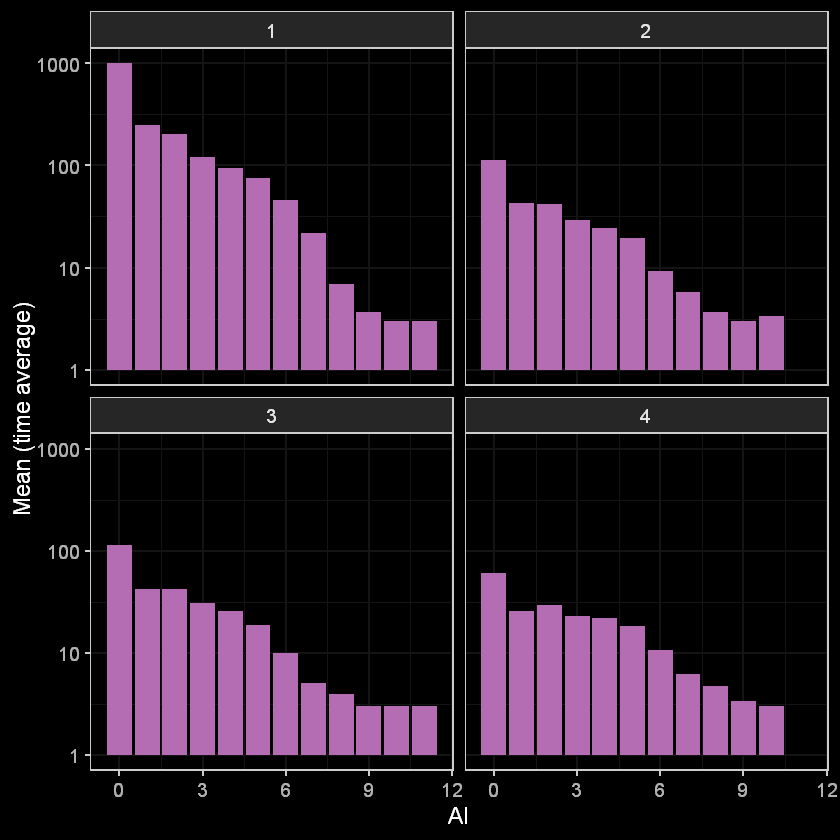

In [175]:
p <- ggplot(ave_coarse_grainned) +
        geom_col(aes(x = AI,
                     y = ave_total), 
                 fill = natparks.pals("Arches2")[3]) +
        dark_theme_bw(base_size = 14) + 
        scale_y_log10() + 
        facet_wrap(~reactor, nrow = 2) + 
        labs(x= "AI", y = "Mean (time average)")
p
ggsave("../plots/220722-Lattice-AI-Dist.jpeg", p, height = 1.33*89, width = 0.66*183, units = "mm")
ggsave("../plots/220722-Lattice-AI-Dist.svg", p, height = 1.33*89, width = 0.66*183, units = "mm")
